In [2]:
import pandas as pd                         # 데이터 분석 패키지
import numpy as np                          # 계산 패키지
import matplotlib.pyplot as plt             # 데이터 시각화 패키지
import seaborn as sns                       # 데이터 시각화 패키지

import xgboost as xgb                       # XGBoost 패키지
from sklearn.model_selection import KFold   # K-Fold CV

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('C:/Python_Project/datacon/bio_simulate/data/train.csv')
test = pd.read_csv('C:/Python_Project/datacon/bio_simulate/data/test.csv')
sample_submission = pd.read_csv('C:/Python_Project/datacon/bio_simulate/data/sample_submission.csv')

In [18]:
train

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


In [17]:
test

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,15,0.04334,0.03279,0.05853,0.04070,0.07704,0.07859,0.06168,0.08903,...,7.889599e-13,NaN,4.903209e-13,1.365078e-12,7.929664e-13,0.000000e+00,0.000000e+00,1.472213e-13,1.479745e-12,5.391520e-12
9996,19996,25,0.00020,0.02009,0.01726,0.03816,0.08300,0.08681,0.15300,0.18099,...,1.240848e-17,6.258180e-18,8.693704e-20,NaN,4.514449e-18,NaN,9.128300e-19,NaN,3.928314e-18,2.586781e-17
9997,19997,15,0.00000,0.00000,0.00120,0.00000,0.04347,0.14882,0.40883,0.80365,...,0.000000e+00,NaN,0.000000e+00,2.610282e-14,7.789652e-15,NaN,1.271388e-15,1.436617e-15,0.000000e+00,1.743751e-13
9998,19998,20,0.08390,0.05690,0.08343,0.12324,0.12720,0.16732,0.18149,0.23766,...,0.000000e+00,7.084232e-18,NaN,0.000000e+00,2.669004e-18,8.586549e-18,0.000000e+00,4.489194e-18,2.892986e-17,NaN


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   rho      10000 non-null  int64  
 2   650_src  10000 non-null  float64
 3   660_src  10000 non-null  float64
 4   670_src  10000 non-null  float64
 5   680_src  10000 non-null  float64
 6   690_src  10000 non-null  float64
 7   700_src  10000 non-null  float64
 8   710_src  10000 non-null  float64
 9   720_src  10000 non-null  float64
 10  730_src  10000 non-null  float64
 11  740_src  10000 non-null  float64
 12  750_src  10000 non-null  float64
 13  760_src  10000 non-null  float64
 14  770_src  10000 non-null  float64
 15  780_src  10000 non-null  float64
 16  790_src  10000 non-null  float64
 17  800_src  10000 non-null  float64
 18  810_src  10000 non-null  float64
 19  820_src  10000 non-null  float64
 20  830_src  10000 non-null  float64
 21  840_src  1000

# 탐색적 자료 분석 
## 결측치 처리 

#### - dst 컬럼별로 약 2,000개의 결측치 존재 
#### - 각 컬럼의평균으로 결측치 처리 

In [48]:
train.isna().sum().plot

In [49]:
test.isna().sum().plot

# 데이터 시각화 

#### - 데이터와 hho, hb02, ca, na의 상관관계 분석 
#### - 비교적 상관관계가 큰 dst컬럼을 feature로 선정 

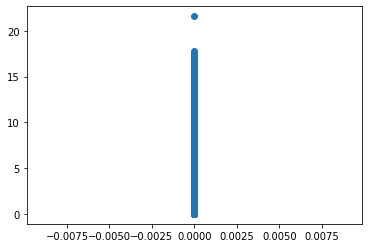

In [20]:
plt.scatter(train['990_dst'],train['hhb'])

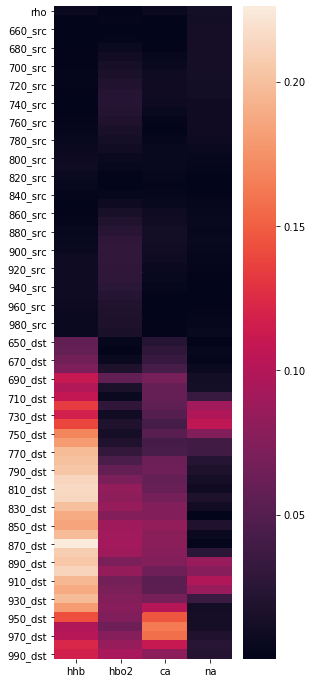

In [36]:
plt.figure(figsize = (4,12))
sns.heatmap(train.corr().loc['rho':'990_dst', 'hhb':].abs())

In [91]:
x_train = train.loc[:, '710_dst':'930_dst']
y_train = train.loc[:, 'hhb':'na']
x_train.shape, y_train.shape

((10000, 23), (10000, 4))

In [44]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   650_dst  8052 non-null   float64
 1   660_dst  8012 non-null   float64
 2   670_dst  8069 non-null   float64
 3   680_dst  8025 non-null   float64
 4   690_dst  7997 non-null   float64
 5   700_dst  8034 non-null   float64
 6   710_dst  8054 non-null   float64
 7   720_dst  7954 non-null   float64
 8   730_dst  7994 non-null   float64
 9   740_dst  8007 non-null   float64
 10  750_dst  7929 non-null   float64
 11  760_dst  7950 non-null   float64
 12  770_dst  8006 non-null   float64
 13  780_dst  8055 non-null   float64
 14  790_dst  7941 non-null   float64
 15  800_dst  7974 non-null   float64
 16  810_dst  8010 non-null   float64
 17  820_dst  7909 non-null   float64
 18  830_dst  8035 non-null   float64
 19  840_dst  7955 non-null   float64
 20  850_dst  7986 non-null   float64
 21  860_dst  7990

# 모델 학습 및 검증 
### - XGBoost를 이용하여 모델 생성 
### - 학습 데이터셋을 5개로 나눠 교차검증 

In [92]:
def train_model(x_data, y_data, k=5):
    models = []
    
    k_fold = KFold(n_splits=k, shuffle=True, random_state=123)
    
    for train_idx, val_idx in k_fold.split(x_data):
        x_train, y_train = x_data.iloc[train_idx], y_data[train_idx]
        x_val, y_val = x_data.iloc[val_idx], y_data[val_idx]
    
        d_train = xgb.DMatrix(data = x_train, label = y_train)
        d_val = xgb.DMatrix(data = x_val, label = y_val)
        
        wlist = [(d_train, 'train'), (d_val, 'eval')]
        
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'mae',
            'seed':777
            }

        model = xgb.train(params=params, dtrain=d_train, num_boost_round=500, verbose_eval=500, evals=wlist)
        models.append(model)
    
    return models

In [93]:
models = {}
for label in y_train.columns:
    print('train column: ', label)
    models[label] = train_model(x_train, y_train[label])

train column:  hhb
[0]	train-mae:5.32217	eval-mae:5.30003
[499]	train-mae:0.04524	eval-mae:1.82375
[0]	train-mae:5.32625	eval-mae:5.26778
[499]	train-mae:0.04607	eval-mae:1.80664
[0]	train-mae:5.32024	eval-mae:5.30527
[499]	train-mae:0.04451	eval-mae:1.91404
[0]	train-mae:5.31354	eval-mae:5.35645
[499]	train-mae:0.04753	eval-mae:1.87645
[0]	train-mae:5.31152	eval-mae:5.38349
[499]	train-mae:0.04501	eval-mae:1.83958
train column:  hbo2
[0]	train-mae:2.46028	eval-mae:2.47276
[499]	train-mae:0.01988	eval-mae:0.79805
[0]	train-mae:2.45980	eval-mae:2.47851
[499]	train-mae:0.02280	eval-mae:0.79275
[0]	train-mae:2.46826	eval-mae:2.42824
[499]	train-mae:0.02118	eval-mae:0.80983
[0]	train-mae:2.46017	eval-mae:2.47832
[499]	train-mae:0.02187	eval-mae:0.79573
[0]	train-mae:2.46353	eval-mae:2.45578
[499]	train-mae:0.02336	eval-mae:0.81282
train column:  ca
[0]	train-mae:6.00140	eval-mae:6.08506
[499]	train-mae:0.07147	eval-mae:2.54475
[0]	train-mae:6.01095	eval-mae:6.03410
[499]	train-mae:0.06660	

In [94]:
for col in models:
    preds = []
    for model in models[col]:
        preds.append(model.predict(xgb.DMatrix(test.loc[:, '710_dst':'930_dst'])))
    pred = np.mean(preds, axis=0)

    sample_submission[col] = pred

In [95]:
sample_submission.head()

,id,hhb,hbo2,ca,na
0,10000,6.573316,4.138476,8.410807,3.258616
1,10001,4.711170,4.105260,10.251360,2.622398
2,10002,9.903534,4.528104,9.149080,3.287806
3,10003,6.742402,3.960461,9.582973,3.249256
4,10004,10.055286,3.052456,7.587319,4.048632


In [96]:
sample_submission.to_csv('C:/Python_Project/datacon/bio_simulate/dataDacon_baseline2.csv', index=False)